# &#x1F494; Heart Attack Analysis

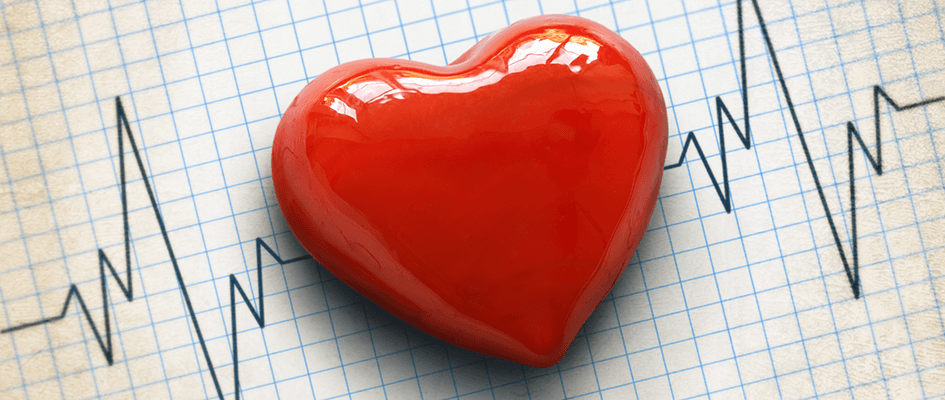

# About the DataSet
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df_sat = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_sat.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.shape

(303, 14)

<Axes: >

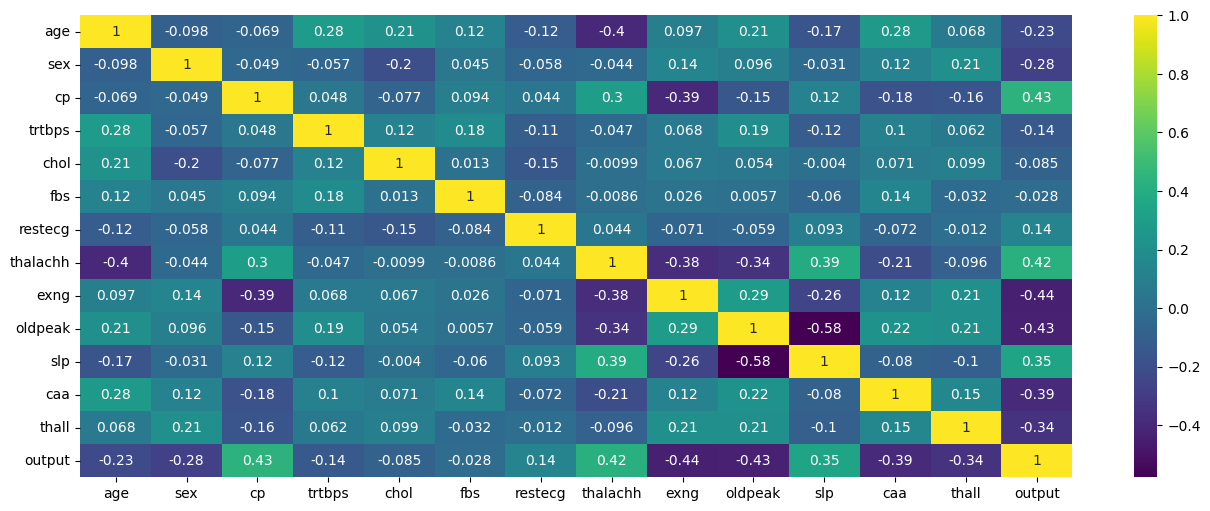

In [8]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='viridis')

In [9]:
X = df.drop('output', axis = 1)
y = df['output']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(227, 13)

In [13]:
X_test.shape

(76, 13)

# Logistic Regression with CV

In [14]:
from sklearn.linear_model import LogisticRegressionCV

In [15]:
model_lr = LogisticRegressionCV(cv = 10, scoring="neg_log_loss")

In [16]:
model_lr.fit(X = X_train, y = y_train)

LogisticRegressionCV(cv=10, scoring='neg_log_loss')

In [17]:
y_pred = model_lr.predict(X_test)

In [18]:
dict_pred = {'Actual': y_test, 'Predicted': y_pred}
predicted = pd.DataFrame(data = dict_pred)
predicted

,Actual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
22,1,1
258,0,0
56,1,1
242,0,0


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
cm = confusion_matrix(y_test, y_pred)

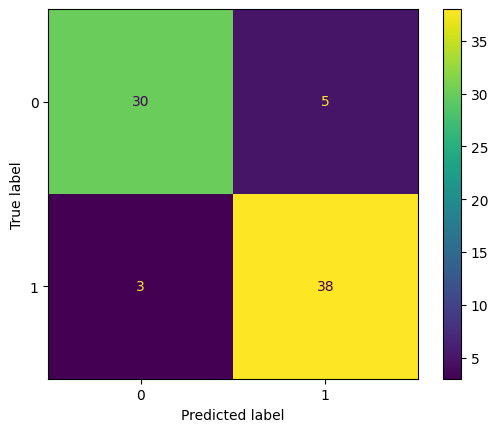

In [21]:
cm_disp = ConfusionMatrixDisplay(cm).plot()

# Neural network

In [22]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-05-05 17:42:10.002055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 17:42:10.002148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 17:42:10.147681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model_nn = Sequential()

model_nn.add(Dense(13, activation='relu')) #13 features
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(100, activation='relu'))
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [24]:
#early_stop = EarlyStopping(monitor = 'val_loss', patience=5)

In [25]:
model_nn.fit(x = X_train, y = y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

I0000 00:00:1714930943.991668      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [26]:
losses = pd.DataFrame(model_nn.history.history)

In [27]:
losses.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

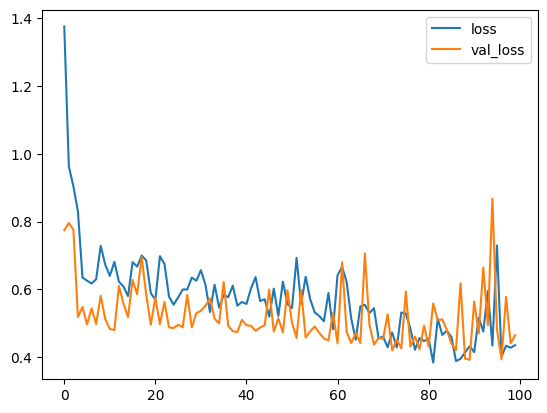

In [28]:
losses[['loss', 'val_loss']].plot()

<Axes: >

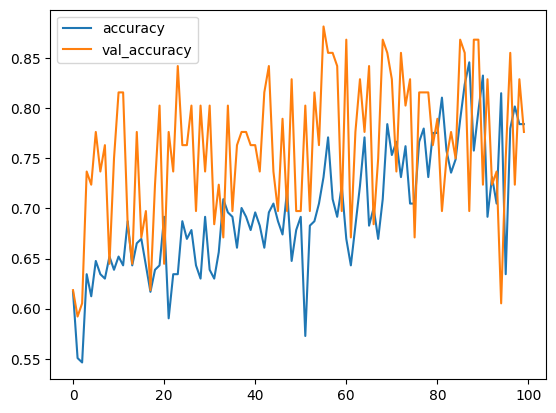

In [29]:
losses[['accuracy', 'val_accuracy']].plot()

In [30]:
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [31]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [33]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.88      0.68      0.77        41

    accuracy                           0.78        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.80      0.78      0.78        76



# Comparison of results

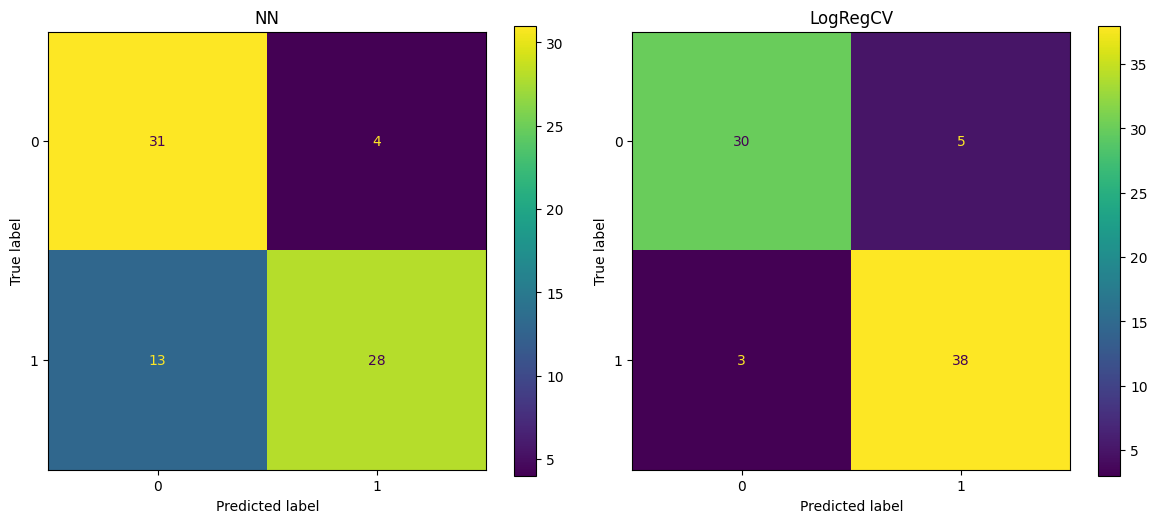

In [34]:
fig, axs = plt.subplots(1,2, figsize = (12,5))

ConfusionMatrixDisplay(cm_nn).plot(ax=axs[0])
axs[0].set_title('NN')

ConfusionMatrixDisplay(cm).plot(ax=axs[1])
axs[1].set_title('LogRegCV')

plt.tight_layout()